In [1]:
import nbtest
import numpy as np

random_seed = np.random.randint(10000)

In [2]:
import graphviz
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, export_graphviz

import shap

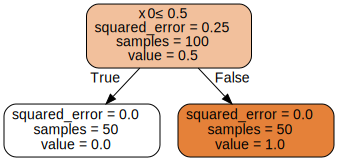

In [3]:
N = 100
M = 4
X = np.zeros((N, M))
X.shape
y = np.zeros(N)
X[: N // 2, 0] = 1
y[: N // 2] = 1
single_split_model = DecisionTreeRegressor(max_depth=1)
nbtest.assert_equal(
    {
        k: v
        for k, v in single_split_model.get_params().items()
        if k != "random_state" and not (hasattr(v, "__module__") and v.__module__.startswith("sklearn"))
    },
    {
        "ccp_alpha": 0.0,
        "criterion": "squared_error",
        "max_depth": 1,
        "max_features": None,
        "max_leaf_nodes": None,
        "min_impurity_decrease": 0.0,
        "min_samples_leaf": 1,
        "min_samples_split": 2,
        "min_weight_fraction_leaf": 0.0,
        "monotonic_cst": None,
        "splitter": "best",
    },
    test_id="nbtest_id_0_2_8",
)
single_split_model.fit(X, y)
dot_data = export_graphviz(single_split_model, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [4]:
xs = [np.ones(M), np.zeros(M)]
df = pd.DataFrame()
nbtest.assert_equal(df.shape, (0, 0), test_id="nbtest_id_1_3_2")
for idx, x in enumerate(xs):
    index = pd.MultiIndex.from_product([[f"Example {idx}"], ["x", "shap_values"]])
    df = pd.concat(
        [
            df,
            pd.DataFrame(
                [x, shap.TreeExplainer(single_split_model).shap_values(x)],
                index=index,
                columns=["x0", "x1", "x2", "x3"],
            ),
        ]
    )
df

x0   x1   x2   x3
Example 0 x            1.0  1.0  1.0  1.0
          shap_values  0.5  0.0  0.0  0.0
Example 1 x            0.0  0.0  0.0  0.0
          shap_values -0.5  0.0  0.0  0.0

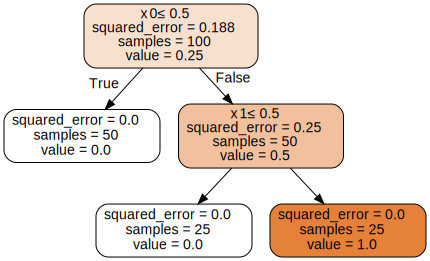

In [5]:
N = 100
M = 4
X = np.zeros((N, M))
X.shape
y = np.zeros(N)
X[: 1 * N // 4, 1] = 1
X[: N // 2, 0] = 1
X[N // 2 : 3 * N // 4, 1] = 1
y[: 1 * N // 4] = 1
and_model = DecisionTreeRegressor(max_depth=2)
nbtest.assert_equal(
    {
        k: v
        for k, v in and_model.get_params().items()
        if k != "random_state" and not (hasattr(v, "__module__") and v.__module__.startswith("sklearn"))
    },
    {
        "ccp_alpha": 0.0,
        "criterion": "squared_error",
        "max_depth": 2,
        "max_features": None,
        "max_leaf_nodes": None,
        "min_impurity_decrease": 0.0,
        "min_samples_leaf": 1,
        "min_samples_split": 2,
        "min_weight_fraction_leaf": 0.0,
        "monotonic_cst": None,
        "splitter": "best",
    },
    test_id="nbtest_id_2_4_10",
)
and_model.fit(X, y)
dot_data = export_graphviz(and_model, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [6]:
xs = np.array([np.ones(M), np.zeros(M)])
df = pd.DataFrame()
nbtest.assert_equal(df.shape, (0, 0), test_id="nbtest_id_3_5_2")
for idx, x in enumerate(xs):
    index = pd.MultiIndex.from_product([[f"Example {idx}"], ["x", "shap_values"]])
    df = pd.concat(
        [
            df,
            pd.DataFrame(
                [x, shap.TreeExplainer(and_model).shap_values(x)], index=index, columns=["x0", "x1", "x2", "x3"]
            ),
        ]
    )
df

x0     x1   x2   x3
Example 0 x            1.000  1.000  1.0  1.0
          shap_values  0.375  0.375  0.0  0.0
Example 1 x            0.000  0.000  0.0  0.0
          shap_values -0.125 -0.125  0.0  0.0

In [7]:
y.mean()

0.25

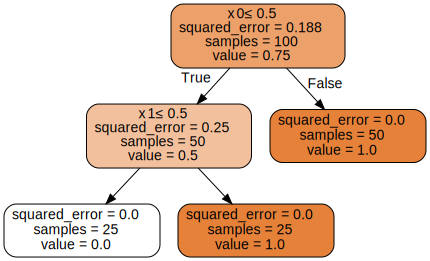

In [8]:
N = 100
M = 4
X = np.zeros((N, M))
X.shape
y = np.zeros(N)
X[: N // 2, 0] = 1
X[: 1 * N // 4, 1] = 1
X[N // 2 : 3 * N // 4, 1] = 1
y[: N // 2] = 1
y[N // 2 : 3 * N // 4] = 1
or_model = DecisionTreeRegressor(max_depth=2)
nbtest.assert_equal(
    {
        k: v
        for k, v in or_model.get_params().items()
        if k != "random_state" and not (hasattr(v, "__module__") and v.__module__.startswith("sklearn"))
    },
    {
        "ccp_alpha": 0.0,
        "criterion": "squared_error",
        "max_depth": 2,
        "max_features": None,
        "max_leaf_nodes": None,
        "min_impurity_decrease": 0.0,
        "min_samples_leaf": 1,
        "min_samples_split": 2,
        "min_weight_fraction_leaf": 0.0,
        "monotonic_cst": None,
        "splitter": "best",
    },
    test_id="nbtest_id_4_7_11",
)
or_model.fit(X, y)
dot_data = export_graphviz(or_model, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [9]:
xs = np.array([np.ones(M), np.zeros(M)])
df = pd.DataFrame()
nbtest.assert_equal(df.shape, (0, 0), test_id="nbtest_id_5_8_2")
for idx, x in enumerate(xs):
    index = pd.MultiIndex.from_product([[f"Example {idx}"], ["x", "shap_values"]])
    df = pd.concat(
        [
            df,
            pd.DataFrame(
                [x, shap.TreeExplainer(or_model).shap_values(x)], index=index, columns=["x0", "x1", "x2", "x3"]
            ),
        ]
    )
df

x0     x1   x2   x3
Example 0 x            1.000  1.000  1.0  1.0
          shap_values  0.125  0.125  0.0  0.0
Example 1 x            0.000  0.000  0.0  0.0
          shap_values -0.375 -0.375  0.0  0.0

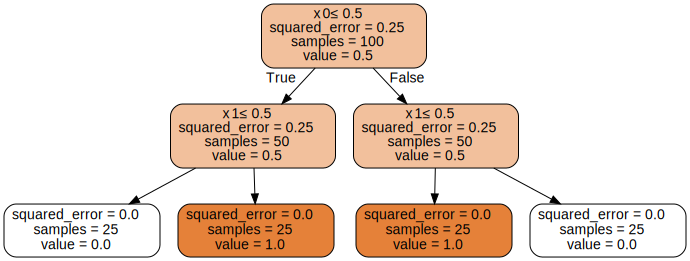

In [10]:
N = 100
M = 4
X = np.zeros((N, M))
X.shape
y = np.zeros(N)
X[: N // 2, 0] = 1
X[: 1 * N // 4, 1] = 1
X[N // 2 : 3 * N // 4, 1] = 1
y[1 * N // 4 : N // 2] = 1
y[N // 2 : 3 * N // 4] = 1
xor_model = DecisionTreeRegressor(max_depth=2)
nbtest.assert_equal(
    {
        k: v
        for k, v in xor_model.get_params().items()
        if k != "random_state" and not (hasattr(v, "__module__") and v.__module__.startswith("sklearn"))
    },
    {
        "ccp_alpha": 0.0,
        "criterion": "squared_error",
        "max_depth": 2,
        "max_features": None,
        "max_leaf_nodes": None,
        "min_impurity_decrease": 0.0,
        "min_samples_leaf": 1,
        "min_samples_split": 2,
        "min_weight_fraction_leaf": 0.0,
        "monotonic_cst": None,
        "splitter": "best",
    },
    test_id="nbtest_id_6_9_11",
)
xor_model.fit(X, y)
dot_data = export_graphviz(xor_model, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [11]:
xs = np.array([np.ones(M), np.zeros(M)])
df = pd.DataFrame()
nbtest.assert_equal(df.shape, (0, 0), test_id="nbtest_id_7_10_2")
for idx, x in enumerate(xs):
    index = pd.MultiIndex.from_product([[f"Example {idx}"], ["x", "shap_values"]])
    df = pd.concat(
        [
            df,
            pd.DataFrame(
                [x, shap.TreeExplainer(xor_model).shap_values(x)], index=index, columns=["x0", "x1", "x2", "x3"]
            ),
        ]
    )
df

x0    x1   x2   x3
Example 0 x            1.00  1.00  1.0  1.0
          shap_values -0.25 -0.25  0.0  0.0
Example 1 x            0.00  0.00  0.0  0.0
          shap_values -0.25 -0.25  0.0  0.0

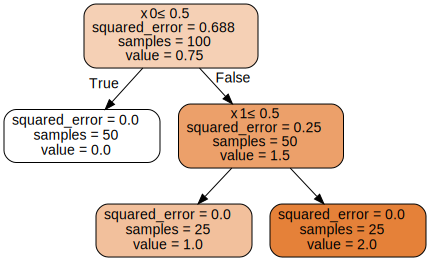

In [12]:
N = 100
M = 4
X = np.zeros((N, M))
X.shape
y = np.zeros(N)
X[: N // 2, 0] = 1
X[: 1 * N // 4, 1] = 1
X[N // 2 : 3 * N // 4, 1] = 1
y[: 1 * N // 4] = 1
y[: N // 2] += 1
and_fb_model = DecisionTreeRegressor(max_depth=2)
nbtest.assert_equal(
    {
        k: v
        for k, v in and_fb_model.get_params().items()
        if k != "random_state" and not (hasattr(v, "__module__") and v.__module__.startswith("sklearn"))
    },
    {
        "ccp_alpha": 0.0,
        "criterion": "squared_error",
        "max_depth": 2,
        "max_features": None,
        "max_leaf_nodes": None,
        "min_impurity_decrease": 0.0,
        "min_samples_leaf": 1,
        "min_samples_split": 2,
        "min_weight_fraction_leaf": 0.0,
        "monotonic_cst": None,
        "splitter": "best",
    },
    test_id="nbtest_id_8_11_11",
)
and_fb_model.fit(X, y)
dot_data = export_graphviz(and_fb_model, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [13]:
xs = np.array([np.ones(M), np.zeros(M)])
df = pd.DataFrame()
nbtest.assert_equal(df.shape, (0, 0), test_id="nbtest_id_9_12_2")
for idx, x in enumerate(xs):
    index = pd.MultiIndex.from_product([[f"Example {idx}"], ["x", "shap_values"]])
    df = pd.concat(
        [
            df,
            pd.DataFrame(
                [x, shap.TreeExplainer(and_fb_model).shap_values(x)], index=index, columns=["x0", "x1", "x2", "x3"]
            ),
        ]
    )
df

x0     x1   x2   x3
Example 0 x            1.000  1.000  1.0  1.0
          shap_values  0.875  0.375  0.0  0.0
Example 1 x            0.000  0.000  0.0  0.0
          shap_values -0.625 -0.125  0.0  0.0